## **Importing required packages**

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

## **Import image**

In [17]:
image = cv2.imread('test1.jpg')

## **Preprocess image**

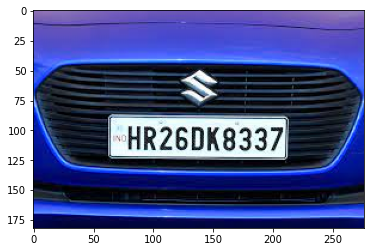

In [18]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert into grayscale
plt.imshow(image)

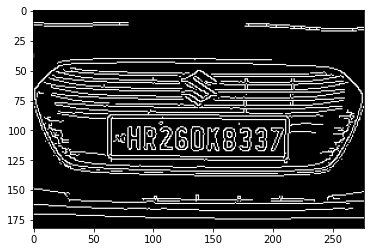

In [19]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## **Finding license plate from image**

In [20]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Find shapes (contours) in image
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] # Get 10 contours with highest area

In [21]:
# Find location of license plate
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True) # Get points of polygon
  if (len(approx)==4): # License plate is rectangular hence we check if polygon has 4 points
    location = approx
    break
print("Coordinates of license plate: ", location)

Coordinates of license plate:  [[[ 65  91]]

 [[210  91]]

 [[210 121]]

 [[ 66 121]]]


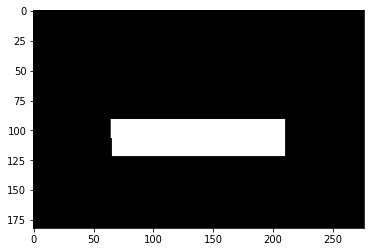

In [22]:
# Masking
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location], 0, 255, -1)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
new_img = cv2.bitwise_and(image, image, mask = mask)

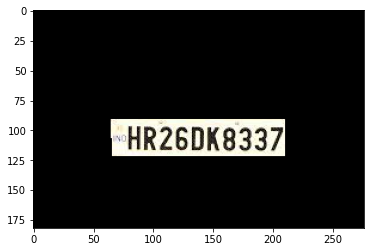

In [23]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

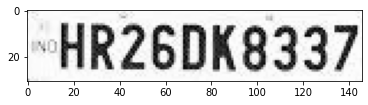

In [24]:
# Get cropped image of license plate

(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## **Text recognition using easyocr**

In [25]:
!pip install easyocr

In [26]:
import easyocr

In [27]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print("Text Recognized => ", result[0][1])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Text Recognized =>  HRZGDK8337
